In [139]:
# importing libraries

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Input, Concatenate, Activation
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [2]:
# loading data from keras
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

# Verifying dataset
print('Image shape: training', xtrain.shape, 'testing: ',xtest.shape)
print('Target shape: training', ytrain.shape, 'testing: ',ytest.shape)
print('Target: ',ytrain)

Image shape: training (60000, 28, 28) testing:  (10000, 28, 28)
Target shape: training (60000,) testing:  (10000,)
Target:  [5 0 4 ... 5 6 8]


In [3]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)

# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)

In [6]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img
xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
xtrain.shape, xtest.shape


((60000, 48, 48, 3), (10000, 48, 48, 3))

In [7]:
## listing the folders containing images

# preparing array that can be used later

class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

In [78]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

print('Training: ',Counter(ytrain))
print('Testing: ',Counter(ytest))

Training:  Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Testing:  Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


In [98]:
# Contruct data only with number 6 and 8
# with assigned number of samples
# Binary ( In this case, we change 6 -> 0, 8 -> 1 )
def sample_data_ind(X, y, num1, size1, num2, size2):
    num1ind = np.where(y == num1)
    num2ind = np.where(y == num2)
    numsind1 = np.random.choice(np.where(y == num1)[0], size1)
    numsind2 = np.random.choice(np.where(y == num2)[0], size2)
    numsinds = np.concatenate([numsind1, numsind2])
    np.random.shuffle(numsinds)
    sx = X[numsinds]
    sy = y[numsinds]

    sy[sy == num1] = 0
    sy[sy == num2] = 1
    
    return sx, sy
    
SampleXtrain, SampleYtrain = sample_data_ind(xtrain, ytrain, 6, 3000, 8, 1000)
SampleXtest, SampleYtest = sample_data_ind(xtest, ytest, 6, 300, 8, 100)

test_images=[]
test_images=SampleXtest
test_images_Original=[]
test_images_Original=SampleXtest
test_image_label=[] # to store the labels of the images
test_image_label=SampleYtest

val_images=[]
val_images=SampleXtest
val_images_Original=[]
val_images_Original=SampleXtest
val_image_label=[] # to store the labels of the images
val_image_label=SampleYtest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


## Verification of data

### Whole 10 numbers

In [9]:
# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


### Only number 6 and 8

In [99]:
# Training Dataset
print("Training Dataset")

x=np.array(SampleXtrain) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(SampleYtrain) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(4000, 48, 48, 3)
(4000, 2)
Test Dataset
(400, 48, 48, 3)
(400, 2)
Validation Dataset
(400, 48, 48, 3)
(400, 2)


## Modeling from Transfer Learning

In [101]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

Summary of default VGG16 model.



## Original VGG

In [110]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 



In [195]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [196]:
# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Training for original VGG

In [197]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print("Model compilation completed.")

Model compilation completed.


In [198]:
history = model.fit(x,y,epochs=5,batch_size=128,verbose=True,validation_data=(test_images,test_image_label))
print("Fitting the model completed.")

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 586ms/step - accuracy: 0.7511 - loss: 2.7173 - val_accuracy: 0.8975 - val_loss: 0.4222
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 568ms/step - accuracy: 0.9042 - loss: 0.6875 - val_accuracy: 0.9425 - val_loss: 0.2062
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 581ms/step - accuracy: 0.9455 - loss: 0.3496 - val_accuracy: 0.9525 - val_loss: 0.1724
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 616ms/step - accuracy: 0.9524 - loss: 0.2808 - val_accuracy: 0.9575 - val_loss: 0.1457
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 608ms/step - accuracy: 0.9651 - loss: 0.1479 - val_accuracy: 0.9675 - val_loss: 0.1291
Fitting the model completed.


In [ ]:
error_pred = []
for i in range(100):
    if (np.argmax(model.predict(test_images[i].reshape(1, 48, 48, 3)))) != (np.argmax(test_image_label[i])):
        error_pred.append(i)

Wrong prediction on these images


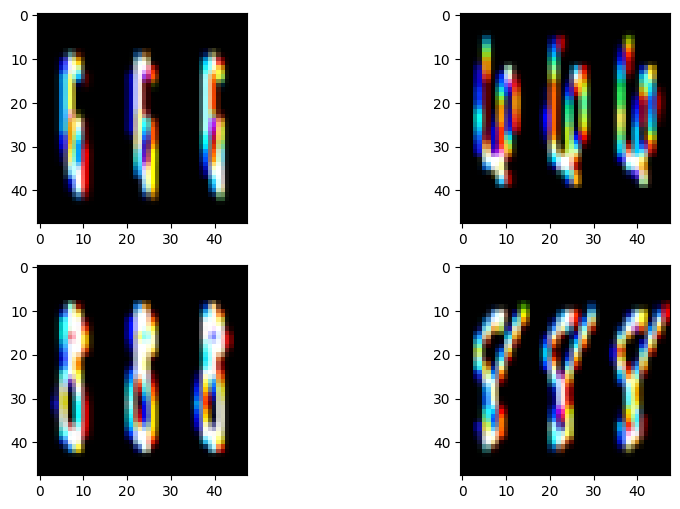

In [202]:
print('Wrong prediction on these images')
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
plt.imshow(test_images[error_pred[0]].astype('int32'))
plt.subplot(2,2,2)
plt.imshow(test_images[error_pred[1]].astype('int32'))
plt.subplot(2,2,3)
plt.imshow(test_images[error_pred[2]].astype('int32'))
plt.subplot(2,2,4)
plt.imshow(test_images[error_pred[3]].astype('int32'))
plt.show()

## Customized VGG 16

In [143]:
def nnelu(x):
    return tf.add(tf.constant(1, dtype=tf.float32), tf.nn.elu(x))
    
last_layer=model_vgg16.output # we are taking last layer of the model
# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
reduced_layer=layers.Dense(128,activation='relu')(flatten)

# define the output spare
no_components = 2

output_weight = layers.Dense(no_components, activation='softmax', name = 'weight')(reduced_layer)
output_mu = layers.Dense(no_components, name = 'mu')(reduced_layer)
output_sigma = layers.Dense(no_components, activation= nnelu, name = 'sigma')(reduced_layer)
output_layer = Concatenate()([output_weight, output_mu, output_sigma])


# Creating modle with input and output layer
VGG_model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
VGG_model.summary()
# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in VGG_model.layers[:-5]:
    layer.trainable=False
VGG_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 48, 48,    │      1,792 │ input_layer_3[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 48, 48,    │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 24, 24,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 24, 24,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 24, 24,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 12, 12,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 12, 12,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 12, 12,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 12, 12,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 6, 6, 256) │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 6, 6, 512) │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 3, 3, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 3, 3, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 3, 3, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 14,781,126 (56.39 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

We are making all the layers intrainable except the last layer. 



Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 48, 48,    │      1,792 │ input_layer_3[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 48, 48,    │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 24, 24,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 24, 24,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 24, 24,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 12, 12,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 12, 12,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 12, 12,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 12, 12,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 6, 6, 256) │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 6, 6, 512) │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 3, 3, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 3, 3, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 3, 3, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 14,781,126 (56.39 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [159]:
def custom_loss(y_true, par_vec):
    
    w = par_vec[:, :no_components]
    m = par_vec[:, no_components:2*no_components]
    lgs = par_vec[:, 2*no_components:]
    
    weights_pred = tf.nn.softmax(w, axis=-1)
    cce = keras.losses.CategoricalCrossentropy()

    return cce(y_true, weights_pred) 

In [160]:
VGG_model.compile(loss=custom_loss, optimizer='adam',metrics=['accuracy'])
print("Model compilation completed.")

Model compilation completed.


In [161]:
history = VGG_model.fit(x,y,epochs=5,batch_size=128,verbose=True,validation_data=(test_images,test_image_label))
print("Fitting the model completed.")

Epoch 1/5
[[0.731058657 0.268941462]
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]
 ...
 [0.731058657 0.268941462]
 [0.731058359 0.268941581]
 [0.731058657 0.268941462]]
 1/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1406 - loss: 0.5477[[0.731058657 0.268941462]
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]
 ...
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]]
 2/32 ━━━━━━━━━━━━━━━━━━━━ 17s 595ms/step - accuracy: 0.1230 - loss: 0.5476[[0.731058657 0.268941462]
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]
 ...
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]
 [0.731058359 0.268941551]]
 3/32 ━━━━━━━━━━━━━━━━━━━━ 16s 580ms/step - accuracy: 0.1133 - loss: 0.5433[[0.731058657 0.268941462]
 [0.730967402 0.269032657]
 [0.731050432 0.268949509]
 ...
 [0.731058538 0.268941462]
 [0.731058657 0.268941462]
 [0.731058657 0.268941462]]
 4/32 ━━━━━━━━━━━━━━━━━━━━ 15s 569ms/step - accuracy: 0.1064 - loss: 0.5375[[0.731058657 0.26894

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[ 1.1150048e-03,  9.9888498e-01,  1.7350906e+01, -3.4878635e+00,
         2.2464001e+00,  4.5496798e+00]], dtype=float32)

In [ ]:
predm = []
predv = []
for i in range(100):
    predm.append(np.argmax(model.predict(test_images[i].reshape(1,48,48,3))[0][:2]))
    predv.append(np.argmax(VGG_model.predict(test_images[i].reshape(1,48,48,3))[0][:2]))

In [218]:
accm = 0
accv = 0
for i in range(100):
    if(predm[i] == (np.argmax(test_image_label[i]))):
        accm += 1
    if(predv[i]) == (np.argmax(test_image_label[i])):
        accv += 1

## Plot for error prediction

In [222]:
from scipy.stats import norm

spred = VGG_model.predict(test_images[error_pred[0]].reshape(1,48,48,3))[0]
def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for m, s, p in zip(loc, scale, weights):
        d += p * norm.pdf(x, loc = m, scale = s)
    return d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


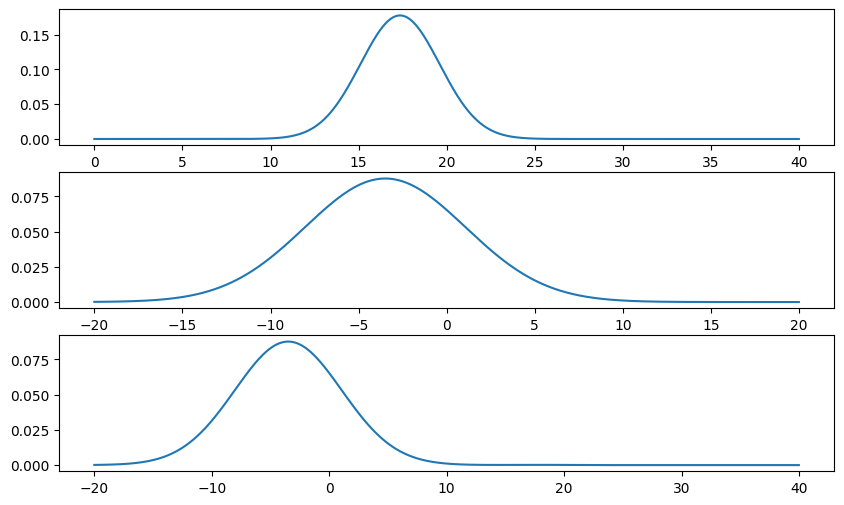

In [237]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(np.arange(0, 40, 0.01), norm.pdf(np.arange(0, 40, 0.01), spred[2], spred[4]))
plt.subplot(3,1,2)
plt.plot(np.arange(-20, 20, 0.01), norm.pdf(np.arange(-20, 20, 0.01), spred[3], spred[5]))
plt.subplot(3,1,3)
ymix = spred[0]*norm.pdf(np.arange(-20, 40, 0.01), spred[2], spred[4]) + spred[1]*norm.pdf(np.arange(-20, 40, 0.01), spred[3], spred[5])
plt.plot(np.arange(-20, 40, 0.01), ymix)
plt.show()

## Training setting

In [21]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [22]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()



Model compilation completed.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# Fit the Model

# xtrain2=xtrain.reshape(60000,48,48,3)
# xtest2=xtest.reshape(10000,48,48,3)

history = model.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 264s 705ms/step - accuracy: 0.5240 - loss: 5.2617 - val_accuracy: 0.8504 - val_loss: 0.6777
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 264s 705ms/step - accuracy: 0.8641 - loss: 0.5617 - val_accuracy: 0.8931 - val_loss: 0.4206
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 266s 709ms/step - accuracy: 0.9008 - loss: 0.3606 - val_accuracy: 0.9026 - val_loss: 0.3473
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 266s 710ms/step - accuracy: 0.9134 - loss: 0.3032 - val_accuracy: 0.9165 - val_loss: 0.3006
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 273s 729ms/step - accuracy: 0.9192 - loss: 0.2697 - val_accuracy: 0.9187 - val_loss: 0.2794
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 297s 793ms/step - accuracy: 0.9251 - loss: 0.2445 - val_accuracy: 0.9223 - val_loss: 0.2731
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 286s 764ms/step - accuracy: 0.9252 - loss: 0.2430 - val_accuracy: 0.9202 - val_loss: 0.2696
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2455s 7s/step - accuracy: 0.9242 - l

KeyboardInterrupt: 

## Model Evaluation

In [ ]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))

    
# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 
                                            100*np.max(predictions_array), Get_Element_Name(true_label), 
                                            color=color, horizontalalignment='left'))

# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

## Prediction

In [ ]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))


In [ ]:
# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, 10000) # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images" 
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

In [ ]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    # we are passing "val_images_Original" just to show original image instead of "val_images" 
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()



In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

